# Title: Customer Churn Chronicles: Unmasking Patterns for Business Growth
Auhtor: Z N M Zarif Mahmud
Address: School of Information and Engineering
Dalarna University
Borlänge, Sweden
Email: v23znmah@du.se


# 1. Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Load and Explore Data

In [3]:
# Load the dataset
data = pd.read_csv('/Users/zarifmahmud/Desktop/Customer Churn Chronicles/dataset_customerChurn/customer_churn_dataset-master.csv')
print('Data Loaded')

Data Loaded


In [4]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB
None


CustomerID: A unique identifier for each customer.
Age: The age of the customer.
Gender: The gender of the customer (e.g., Female, Male).
Tenure: The length of time the customer has been with the company.
Usage Frequency: How frequently the customer uses the company's products or services.
Support Calls: The number of support calls made by the customer.
Payment Delay: The delay in payment (in some units) associated with the customer's subscription.
Subscription Type: The type of subscription the customer has (e.g., Standard, Basic, Premium).
Contract Length: The length of the customer's contract (e.g., Annual, Monthly, Quarterly).
Total Spend: The total amount spent by the customer on products or services.
Last Interaction: The time since the customer's last interaction with the company.
Churn: The target variable indicating whether the customer has churned (1) or not (0).

In [52]:
# Display the first few rows of the dataset
print(data.head())

   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.

In [53]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [54]:
data.describe(include= object)

,Gender,Subscription Type,Contract Length
count,440832,440832,440832
unique,2,3,3
top,Male,Standard,Annual
freq,250252,149128,177198


In [55]:
data.nunique()

CustomerID           440832
Age                      48
Gender                    2
Tenure                   60
Usage Frequency          30
Support Calls            11
Payment Delay            31
Subscription Type         3
Contract Length           3
Total Spend           68363
Last Interaction         30
Churn                     2
dtype: int64

In [56]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
440828    False
440829    False
440830    False
440831    False
440832    False
Length: 440833, dtype: bool

# 3. Data Preprocessing

In [57]:
# Drop any irrelevant columns
updatedData = data.drop(['CustomerID'], axis=1)

In [58]:
x= updatedData.isna().sum()
print(x)

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [59]:
# Check for missing values
# get the number of missing data points per column
missing_values_count = updatedData.isnull().sum()
print(missing_values_count)

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [60]:
# how many total missing values do we have?
total_cells = np.product(updatedData.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.00022684327171513928


In [61]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
updatedData.fillna(method='bfill', axis=0).fillna(0)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [62]:
updatedData.isnull().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [63]:
# finding index of the missing data
updatedData[updatedData['Total Spend'].isnull()].index.tolist()

[199295]

In [64]:
# Drop the row with null value from the  data
updatedData.drop(index=[199295], inplace=True)


In [65]:
updatedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB


In [66]:
# Get list of categorical variables
s = (updatedData.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Gender', 'Subscription Type', 'Contract Length']


In [67]:
# Encode categorical variables using one-hot encoding
updatedData = pd.get_dummies(updatedData, columns=['Gender', 'Subscription Type', 'Contract Length']).copy()



In [68]:
updatedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440832 entries, 0 to 440832
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         440832 non-null  float64
 1   Tenure                      440832 non-null  float64
 2   Usage Frequency             440832 non-null  float64
 3   Support Calls               440832 non-null  float64
 4   Payment Delay               440832 non-null  float64
 5   Total Spend                 440832 non-null  float64
 6   Last Interaction            440832 non-null  float64
 7   Churn                       440832 non-null  float64
 8   Gender_Female               440832 non-null  uint8  
 9   Gender_Male                 440832 non-null  uint8  
 10  Subscription Type_Basic     440832 non-null  uint8  
 11  Subscription Type_Premium   440832 non-null  uint8  
 12  Subscription Type_Standard  440832 non-null  uint8  
 13  Contract Lengt

# 4. Features Engineering

This ratio might provide insights into customer satisfaction and potential churn.

In [69]:
# Feature Engineering: Calculate the ratio of Support Calls to Usage Frequency. 
updatedData['Support to Usage Ratio'] = updatedData['Support Calls'] / updatedData['Usage Frequency']

This might help capture the impact of recent interactions on churn.

In [70]:
# Recent Interaction (0 for less recent, 1 for more recent)
#updatedData['Recent Interaction'] = (updatedData['Last Interaction'] >= 15).astype(int)


In [71]:
# Display the first few rows of the updated dataset
print(updatedData.head())

    Age  Tenure  Usage Frequency  Support Calls  Payment Delay  Total Spend  \
0  30.0    39.0             14.0            5.0           18.0        932.0   
1  65.0    49.0              1.0           10.0            8.0        557.0   
2  55.0    14.0              4.0            6.0           18.0        185.0   
3  58.0    38.0             21.0            7.0            7.0        396.0   
4  23.0    32.0             20.0            5.0            8.0        617.0   

   Last Interaction  Churn  Gender_Female  Gender_Male  \
0              17.0    1.0              1            0   
1               6.0    1.0              1            0   
2               3.0    1.0              1            0   
3              29.0    1.0              0            1   
4              20.0    1.0              0            1   

   Subscription Type_Basic  Subscription Type_Premium  \
0                        0                          0   
1                        1                          0   
2    

In [72]:
updatedData.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,Support to Usage Ratio
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107,0.432319,0.567681,0.324446,0.337267,0.338288,0.401963,0.197590,0.400447,0.471321
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477,0.495399,0.495399,0.468168,0.472777,0.473127,0.490295,0.398182,0.489990,0.981402
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.444444
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


# 5.Exploratory Data Analysis (EDA)

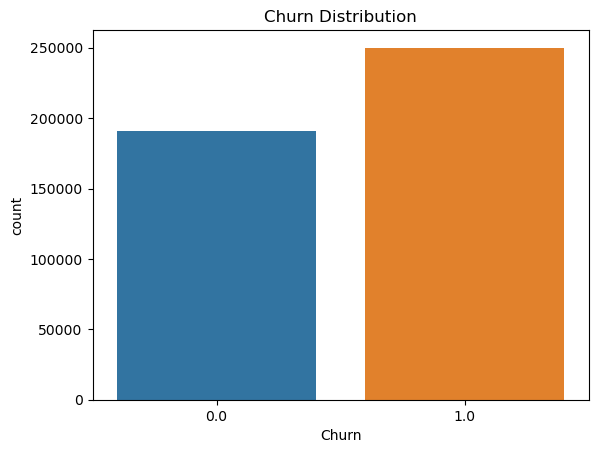

In [73]:
# Visualize the distribution of churn
sns.countplot(data=updatedData, x='Churn')
plt.title('Churn Distribution')
plt.show()

In [74]:
# Explore the relationship between features and churn
#sns.pairplot(data=updatedData, hue='Churn')
#plt.show()

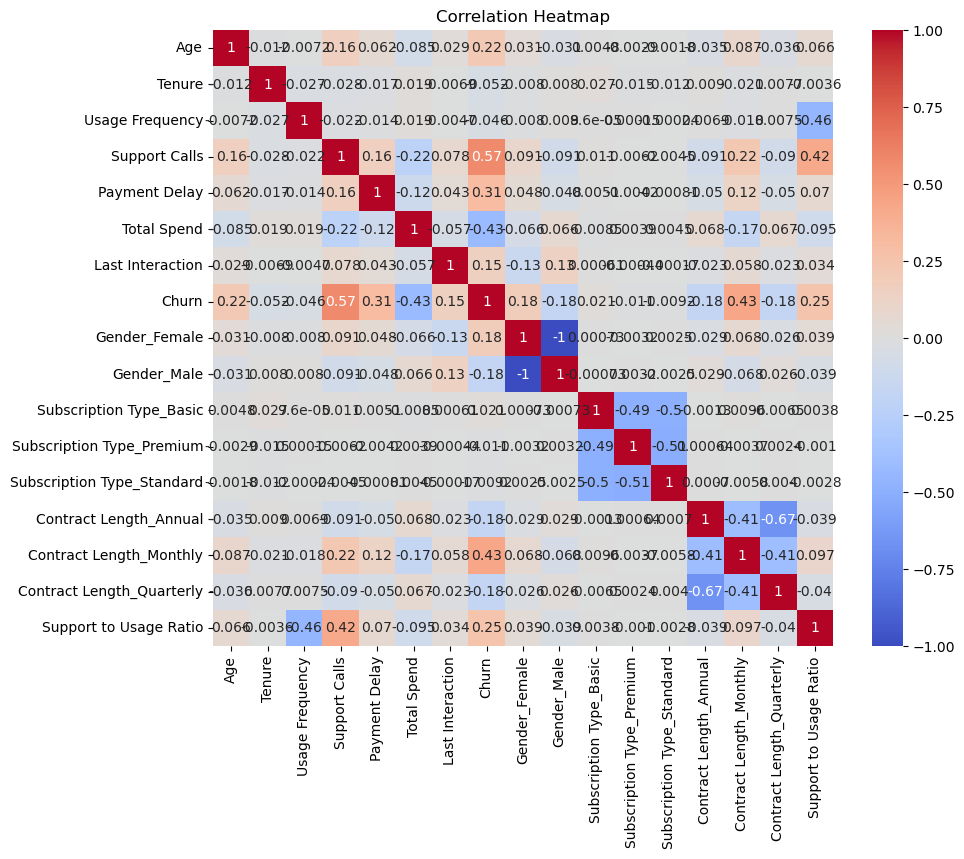

In [75]:
# Visualize correlations using a heatmap
correlation_matrix = updatedData.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Checking for potential outliers

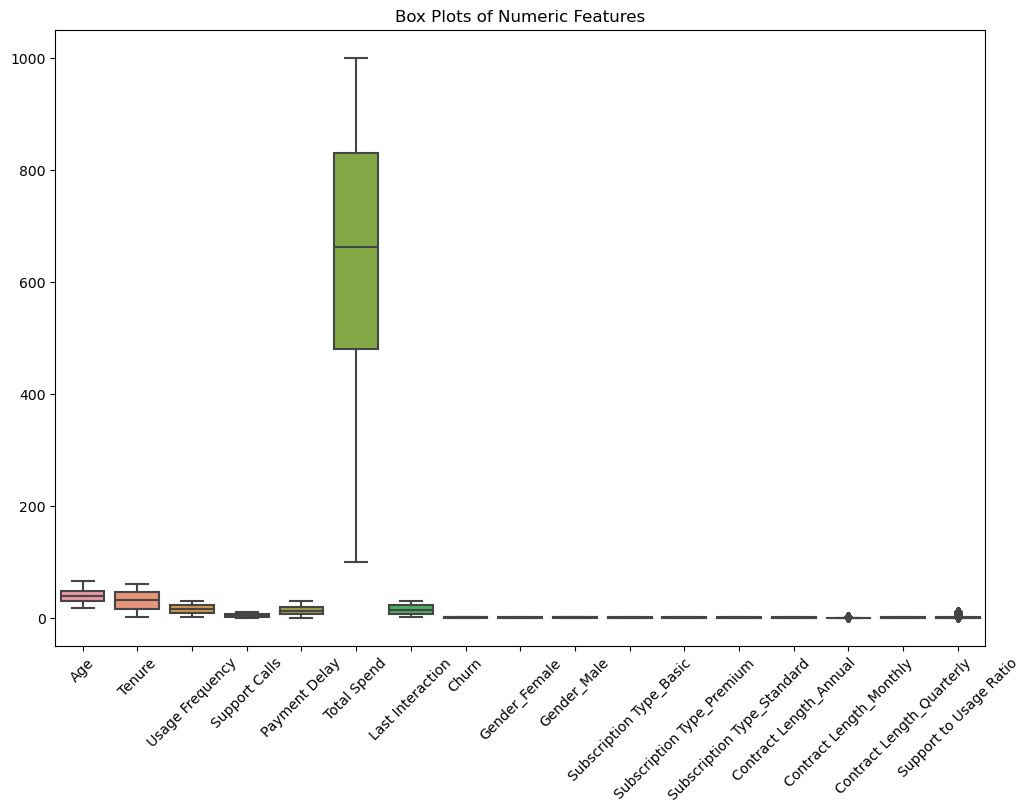

In [76]:
# Create box plots for numeric features
plt.figure(figsize=(12, 8))
sns.boxplot(updatedData)
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=45)
plt.show()

In [77]:
from scipy.stats import zscore

z_scores = zscore(updatedData)
outliers = (z_scores > 3) | (z_scores < -3)
outlier_indices = updatedData.index[outliers.any(axis=1)].tolist()
print("Indices of potential outliers:", outlier_indices)


Indices of potential outliers: [1, 36, 59, 63, 113, 216, 227, 286, 290, 327, 362, 444, 524, 532, 554, 611, 614, 619, 625, 722, 726, 729, 731, 796, 828, 841, 853, 873, 912, 947, 950, 975, 986, 1000, 1004, 1066, 1194, 1218, 1286, 1326, 1364, 1415, 1534, 1628, 1643, 1687, 1694, 1709, 1768, 1825, 1826, 1827, 1976, 1986, 1990, 1995, 1998, 2008, 2167, 2198, 2289, 2297, 2303, 2327, 2361, 2378, 2388, 2424, 2431, 2442, 2512, 2515, 2570, 2620, 2624, 2628, 2637, 2663, 2667, 2679, 2683, 2774, 2826, 2827, 2876, 2887, 2905, 2910, 2930, 2956, 2989, 2998, 3001, 3022, 3056, 3108, 3144, 3146, 3155, 3228, 3229, 3249, 3261, 3276, 3282, 3288, 3347, 3394, 3433, 3439, 3443, 3452, 3465, 3508, 3509, 3549, 3564, 3596, 3618, 3622, 3633, 3664, 3702, 3714, 3747, 3766, 3772, 3776, 3780, 3782, 3834, 3843, 3851, 3904, 3926, 3932, 3938, 3939, 3991, 4050, 4056, 4076, 4105, 4114, 4230, 4240, 4275, 4282, 4291, 4311, 4313, 4463, 4473, 4570, 4589, 4666, 4692, 4708, 4726, 4729, 4767, 4935, 4965, 4997, 5018, 5055, 5081, 5088

In [78]:
len(outlier_indices)

9198

There are 9198 potential outlier_indices out of 440832

In [79]:
# Remove the outliers based on the threshold
updatedData = updatedData.drop(updatedData.index[outlier_indices])

In [80]:
updatedData.shape

(431634, 17)

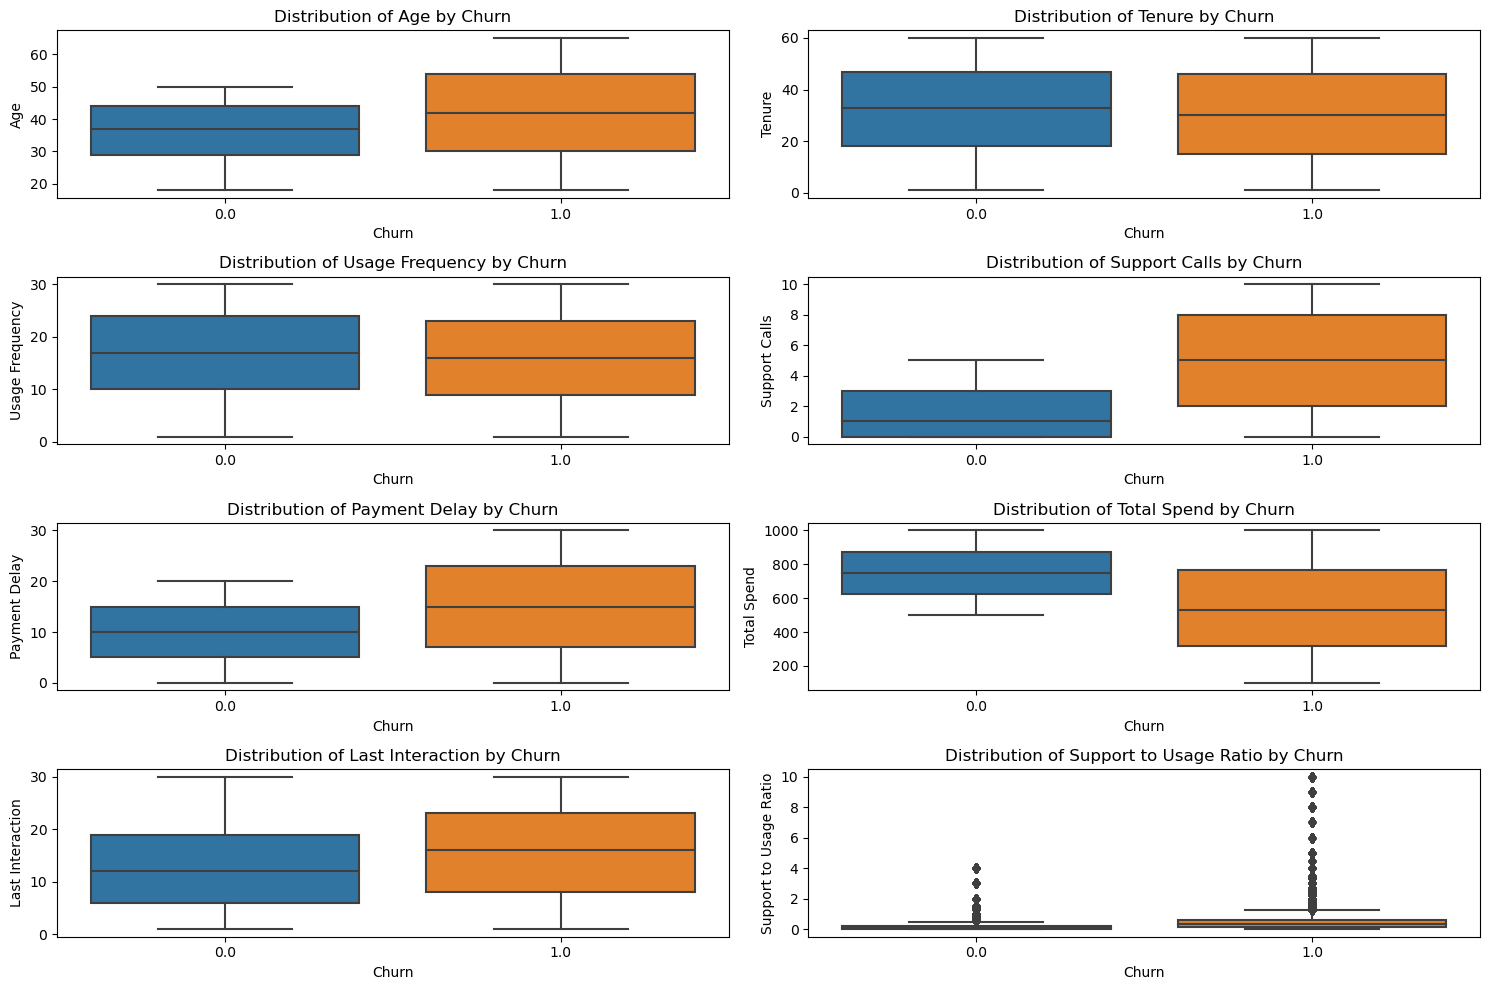

In [81]:
# Visualize the distribution of numeric features by churn status
numeric_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction','Support to Usage Ratio']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))

# Loop through numeric features and create box plots
for i, feature in enumerate(numeric_features[:8]):
    row = i // 2
    col = i % 2
    sns.boxplot(x='Churn', y=feature, data=updatedData, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature} by Churn')

# Adjust layout
plt.tight_layout()
plt.show()

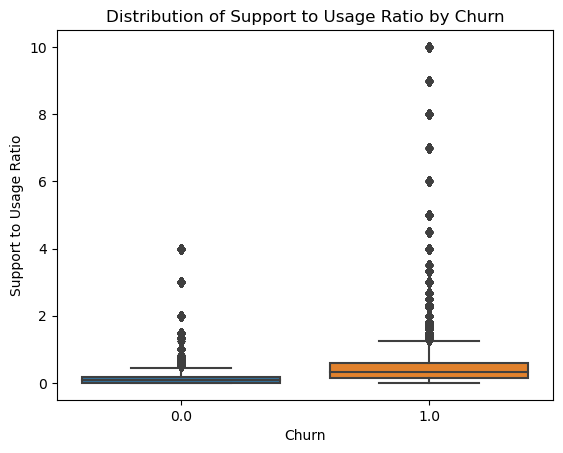

In [82]:
# Visualize the distribution of Support to Usage Ratio by churn status
sns.boxplot(x='Churn', y='Support to Usage Ratio', data=updatedData)
plt.title('Distribution of Support to Usage Ratio by Churn')
plt.xlabel('Churn')
plt.ylabel('Support to Usage Ratio')
plt.show()

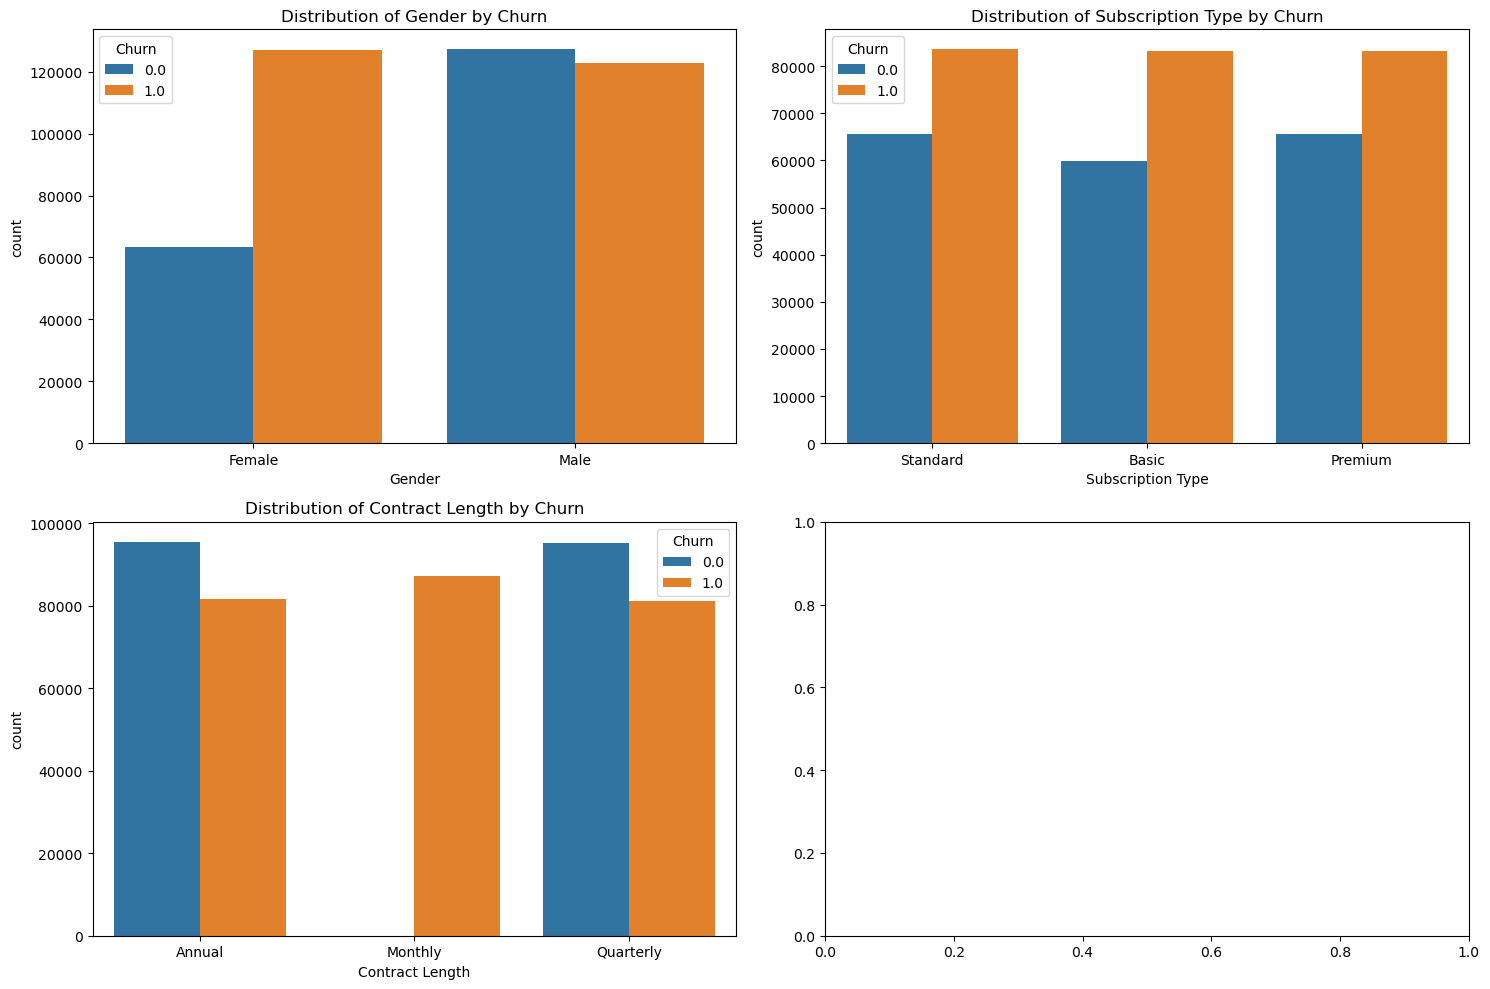

In [84]:
# Visualize the distribution of categorical features by churn status
categorical_features = ['Gender', 'Subscription Type', 'Contract Length']

# Create a 2x2 grid for better visualization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for idx, feature in enumerate(categorical_features):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    sns.countplot(x=feature, hue='Churn', data=data, ax=ax)
    ax.set_title(f'Distribution of {feature} by Churn')

# Adjust layout
plt.tight_layout()
plt.show()

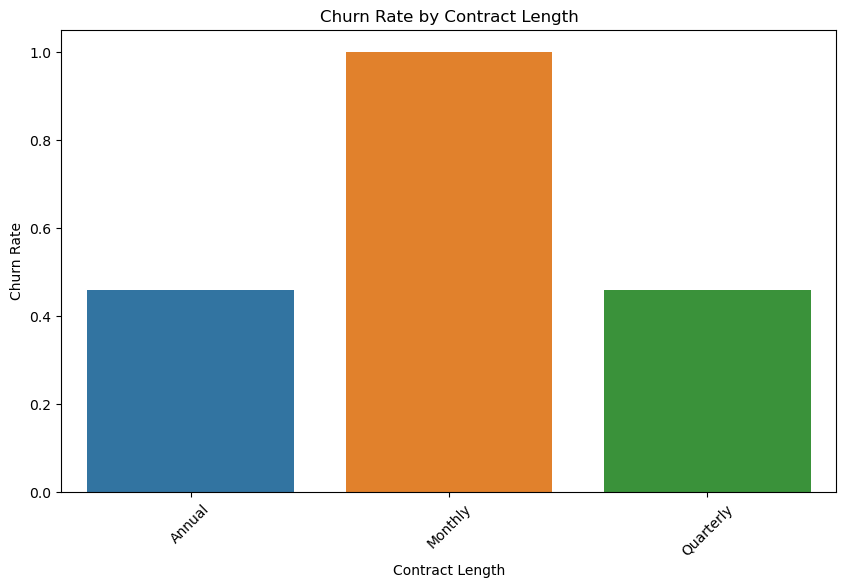

In [85]:
# Churn rate by contract length
contract_churn = data.groupby('Contract Length')['Churn'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=contract_churn.index, y=contract_churn.values)
plt.title('Churn Rate by Contract Length')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

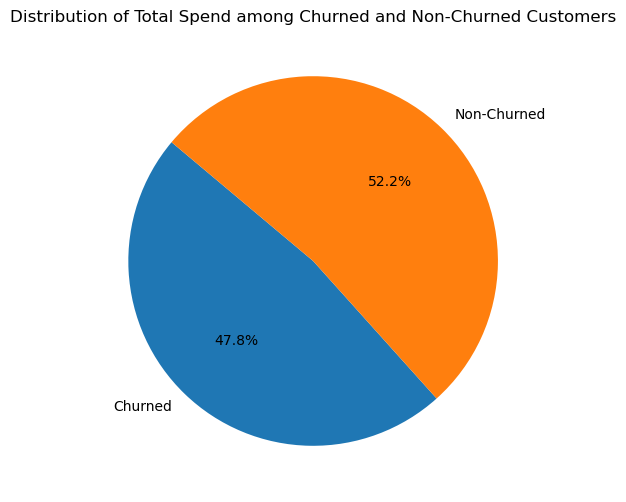

In [86]:
# Calculate the sum of total spend for churned and non-churned customers
total_spend_churned = updatedData[updatedData['Churn'] == 1]['Total Spend'].sum()
total_spend_non_churned = updatedData[updatedData['Churn'] == 0]['Total Spend'].sum()

# Create a pie chart for Total Spend distribution among churned and non-churned customers
plt.figure(figsize=(6, 6))
plt.pie([total_spend_churned, total_spend_non_churned], labels=['Churned', 'Non-Churned'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Spend among Churned and Non-Churned Customers')
plt.show()


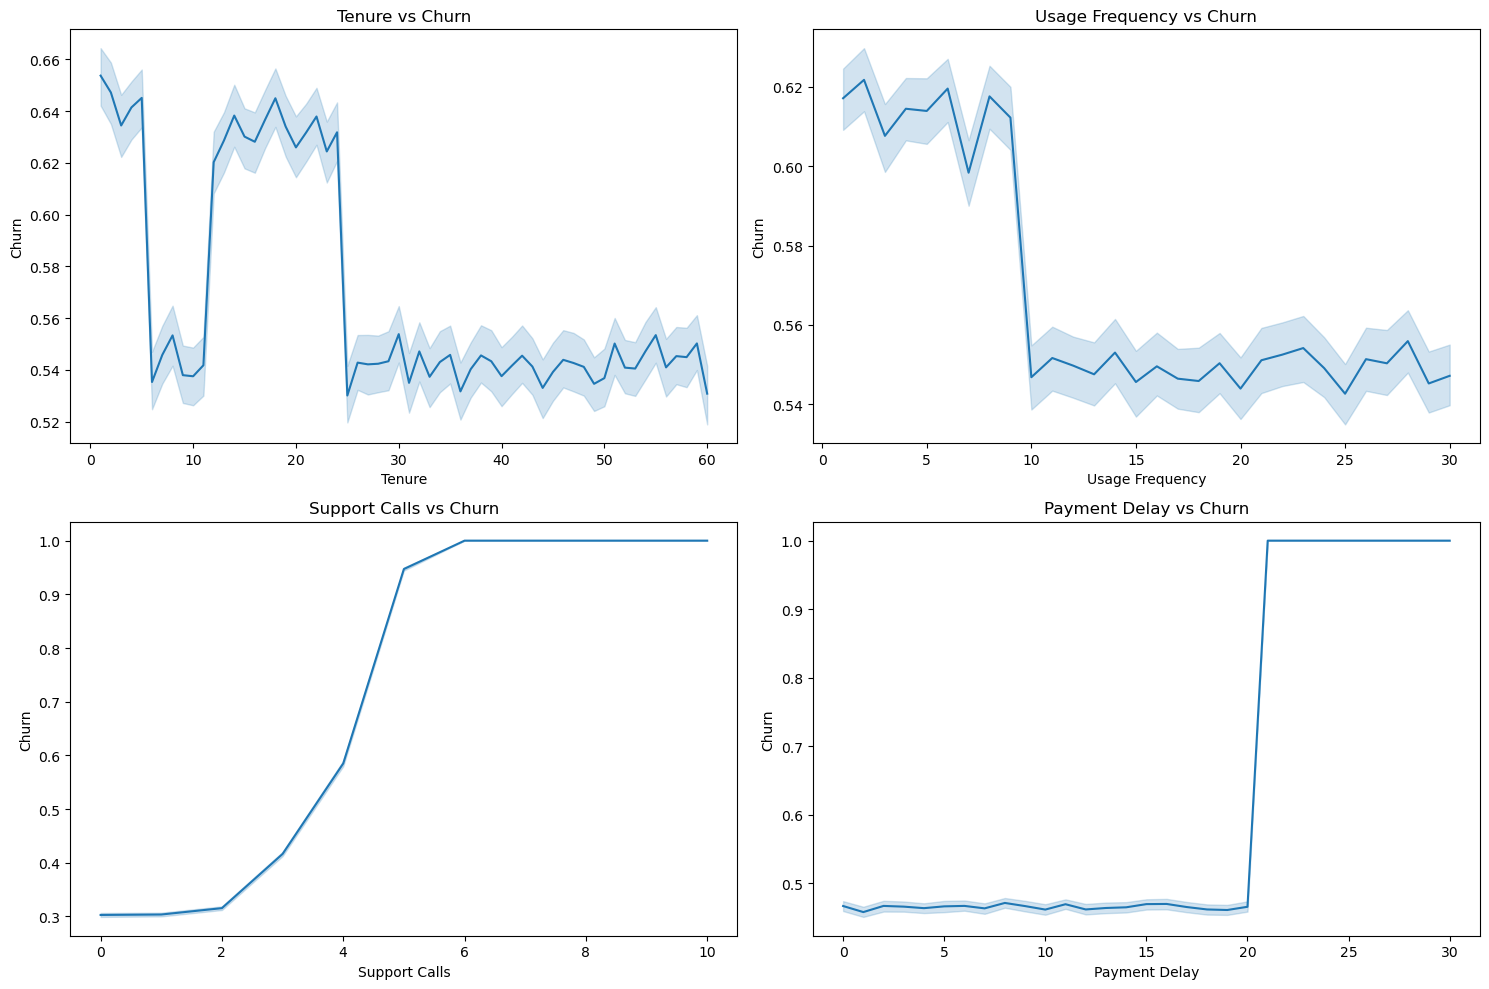

In [87]:
# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Line plot for Tenure vs Churn
sns.lineplot(data=data, x='Tenure', y='Churn', ax=axes[0, 0])
axes[0, 0].set_title('Tenure vs Churn')

# Line plot for Usage Frequency vs Churn
sns.lineplot(data=data, x='Usage Frequency', y='Churn', ax=axes[0, 1])
axes[0, 1].set_title('Usage Frequency vs Churn')

# Line plot for Support Calls vs Churn
sns.lineplot(data=data, x='Support Calls', y='Churn', ax=axes[1, 0])
axes[1, 0].set_title('Support Calls vs Churn')

# Line plot for Payment Delay vs Churn
sns.lineplot(data=data, x='Payment Delay', y='Churn', ax=axes[1, 1])
axes[1, 1].set_title('Payment Delay vs Churn')

# Adjust layout
plt.tight_layout()
plt.show()


# 6. Predictive Modeling

In [88]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the data into the updatedData DataFrame

# Define the number of folds for cross-validation
k = 5

# Initialize empty lists to store accuracy values
logreg_accuracy = []
rf_accuracy = []

# Initialize empty arrays to store confusion matrices
logreg_conf_matrices = []
rf_conf_matrices = []

# Initialize empty lists to store F1-scores
logreg_train_f1_scores = []
logreg_test_f1_scores = []
rf_train_f1_scores = []
rf_test_f1_scores = []

# Perform k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)
for train_index, validation_index in kf.split(updatedData):
    train_fold = updatedData.iloc[train_index]
    validation_fold = updatedData.iloc[validation_index]
    
    # Separate the target variable from the features
    X_train = train_fold.drop('Churn', axis=1)
    y_train = train_fold['Churn']
    X_validation = validation_fold.drop('Churn', axis=1)
    y_validation = validation_fold['Churn']
    
    # Scale the data using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_validation_scaled = scaler.transform(X_validation)
    
    # Train the logistic regression model
    logreg_model = LogisticRegression(max_iter=1000, random_state=42)
    logreg_model.fit(X_train_scaled, y_train)
    
    # Make predictions using the logistic regression model on the validation set
    logreg_predictions = logreg_model.predict(X_validation_scaled)
    
    # Calculate the accuracy for logistic regression
    logreg_accuracy.append(accuracy_score(y_validation, logreg_predictions))
    
    # Calculate the confusion matrix for logistic regression
    logreg_conf_matrices.append(confusion_matrix(y_validation, logreg_predictions))
    
    # Train the random forest classifier model
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    
    # Make predictions using the random forest classifier model on the validation set
    rf_predictions = rf_model.predict(X_validation_scaled)
    
    # Calculate the accuracy for random forest classifier
    rf_accuracy.append(accuracy_score(y_validation, rf_predictions))
    
    # Calculate the confusion matrix for random forest classifier
    rf_conf_matrices.append(confusion_matrix(y_validation, rf_predictions))

    # Make predictions using the models on both training and validation sets
    logreg_train_predictions = logreg_model.predict(X_train_scaled)
    logreg_test_predictions = logreg_model.predict(X_validation_scaled)
    rf_train_predictions = rf_model.predict(X_train_scaled)
    rf_test_predictions = rf_model.predict(X_validation_scaled)
    
    # Calculate F1-scores and store them in lists
    logreg_train_f1_scores.append(f1_score(y_train, logreg_train_predictions))
    logreg_test_f1_scores.append(f1_score(y_validation, logreg_test_predictions))
    rf_train_f1_scores.append(f1_score(y_train, rf_train_predictions))
    rf_test_f1_scores.append(f1_score(y_validation, rf_test_predictions))

# Print the average accuracy for each model
print("Logistic Regression Accuracy:", np.mean(logreg_accuracy))
print("Random Forest Classifier Accuracy:", np.mean(rf_accuracy))

# Print confusion matrices and classification reports
for i in range(k):
    print(f"Fold {i + 1}")
    print("Logistic Regression:")
    print("Confusion Matrix:\n", logreg_conf_matrices[i])
    print("Classification Report:\n", classification_report(y_validation, logreg_predictions))
    
    print("Random Forest Classifier:")
    print("Confusion Matrix:\n", rf_conf_matrices[i])
    print("Classification Report:\n", classification_report(y_validation, rf_predictions))
    print("="*50)


Logistic Regression Accuracy: 0.894366524077965
Random Forest Classifier Accuracy: 0.9434381818800588
Fold 1
Logistic Regression:
Confusion Matrix:
 [[34520  3530]
 [ 5486 42791]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88     38025
         1.0       0.92      0.88      0.90     48301

    accuracy                           0.89     86326
   macro avg       0.89      0.90      0.89     86326
weighted avg       0.90      0.89      0.89     86326

Random Forest Classifier:
Confusion Matrix:
 [[37772   278]
 [ 4522 43755]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.99      0.94     38025
         1.0       0.99      0.90      0.94     48301

    accuracy                           0.94     86326
   macro avg       0.94      0.95      0.94     86326
weighted avg       0.95      0.94      0.94     86326

Fold 2
Logistic Regression:
Confusion Matr

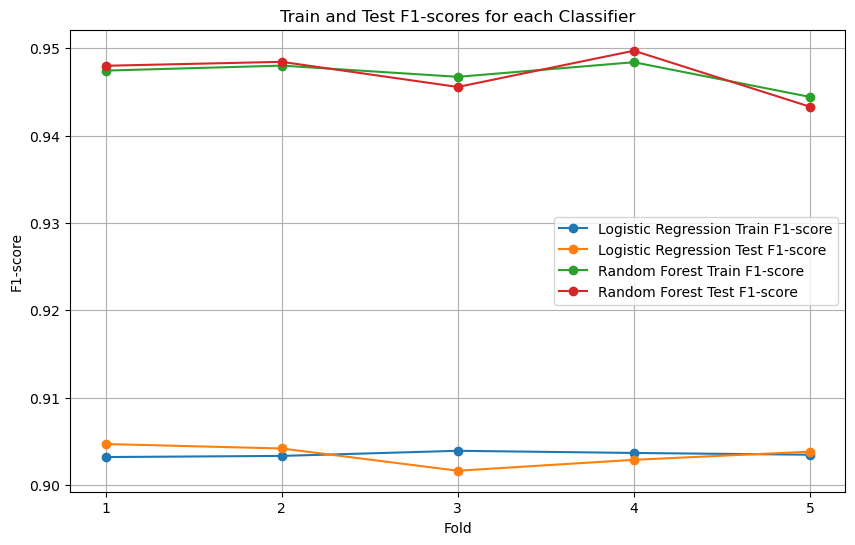

In [89]:
# Plot Train and Test F1-scores for both classifiers
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, k+1), logreg_train_f1_scores, label='Logistic Regression Train F1-score', marker='o')
plt.plot(np.arange(1, k+1), logreg_test_f1_scores, label='Logistic Regression Test F1-score', marker='o')
plt.plot(np.arange(1, k+1), rf_train_f1_scores, label='Random Forest Train F1-score', marker='o')
plt.plot(np.arange(1, k+1), rf_test_f1_scores, label='Random Forest Test F1-score', marker='o')
plt.xlabel('Fold')
plt.ylabel('F1-score')
plt.title('Train and Test F1-scores for each Classifier')
plt.xticks(np.arange(1, k+1))
plt.legend()
plt.grid(True)
plt.show()

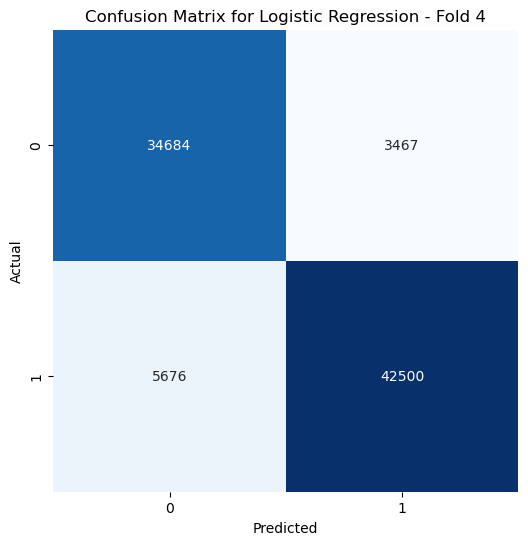

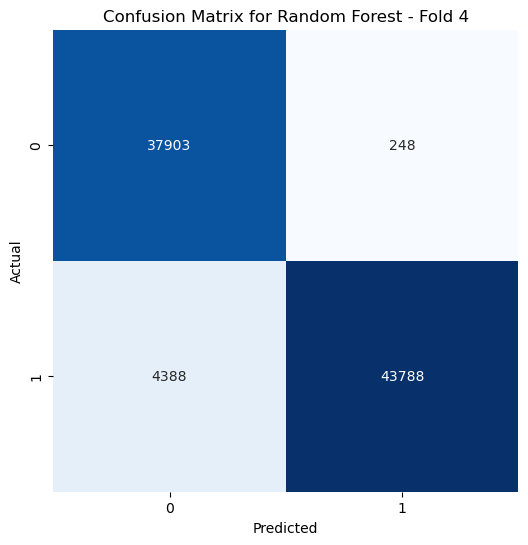

In [90]:
# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 6))
sns.heatmap(logreg_conf_matrices[3], annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for Logistic Regression - Fold {4}')
plt.show()

# Plot Confusion Matrix for Random Forest Classifier
plt.figure(figsize=(6, 6))
sns.heatmap(rf_conf_matrices[3], annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for Random Forest - Fold {4}')
plt.show()

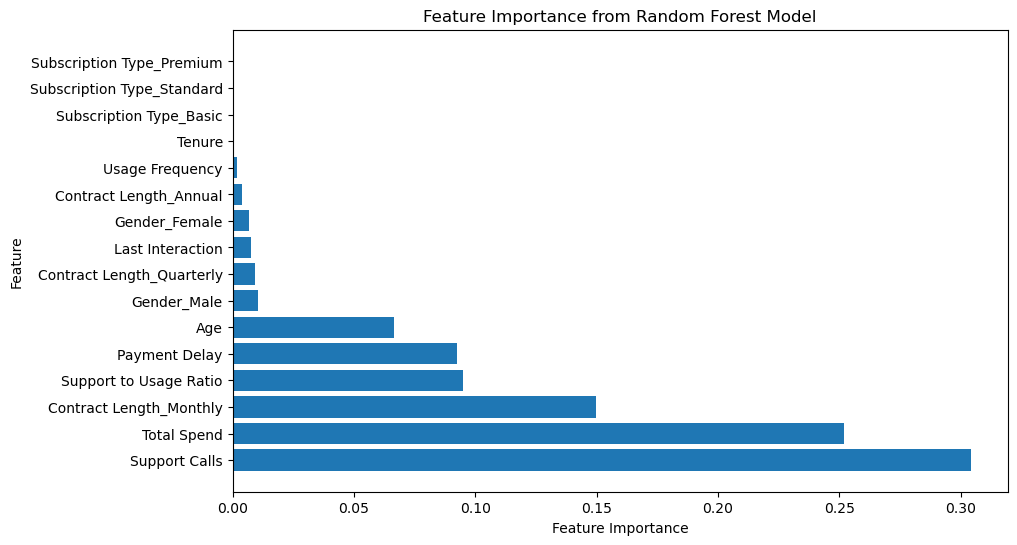

In [91]:
# Get feature importances from the trained random forest model
feature_importances = rf_model.feature_importances_

# Get the column names (features) from the DataFrame
feature_names = updatedData.drop('Churn', axis=1).columns

# Create a DataFrame to store feature importances and their corresponding names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Model')
plt.show()

In [92]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the data into the updatedData DataFrame

# Separate the target variable from the features
X = updatedData.drop('Churn', axis=1)
y = updatedData['Churn']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [ 0.00378945 -0.00075778 -0.00159124  0.06501867  0.01022013 -0.00053426
  0.0054244   0.05337939 -0.05337939  0.00763209 -0.00413125 -0.00350085
 -0.10932832  0.21928674 -0.10995841 -0.00841387]
Intercept: 0.4129627716801179


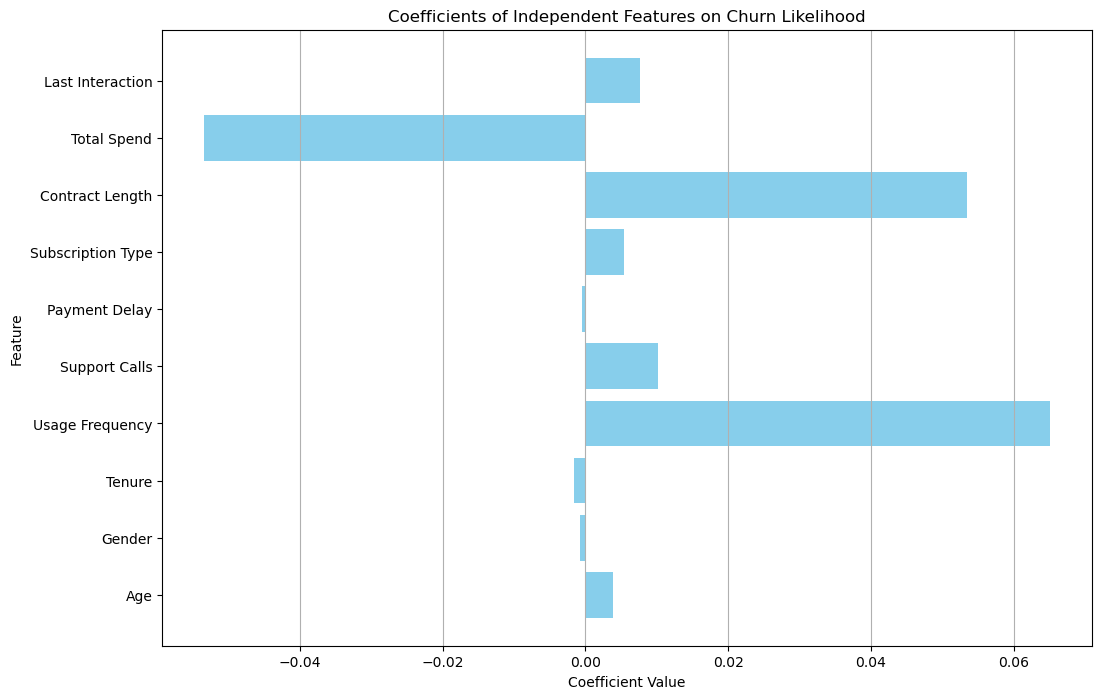

In [93]:
import matplotlib.pyplot as plt

# Coefficients from the linear regression model
coefficients = [0.00378945, -0.00075778, -0.00159124, 0.06501867, 0.01022013,
                -0.00053426, 0.0054244, 0.05337939, -0.05337939, 0.00763209,]

# Corresponding feature names
feature_names = ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
                 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
                 'Last Interaction']

# Create a bar plot for the coefficients
plt.figure(figsize=(12, 8))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Independent Features on Churn Likelihood')
plt.grid(axis='x')
plt.show()
